<a href="https://colab.research.google.com/github/RishabhQuantum/Nuclear-Dynamics/blob/Nuclear-Photon-Entanglement/Nuclear_photon_entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 34.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import (Qobj,tensor,negativity, sigmax, sigmay, sigmaz)

In [3]:
# Horodecki criterion for Bell violation
# ref: https://doi.org/10.1016/0375-9601(95)00214-N
def horodecki_criterion(rho):

# correlation matrix T
  T = np.zeros((3, 3))
  pauli = [sigmax(), sigmay(), sigmaz()]

  for i in range(3):
    for j in range(3):
      T[i, j] = (tensor(pauli[i], pauli[j])*rho).tr().real

# eigenvalues of T^T T in ascending order
  s = np.linalg.eigvals(T.transpose()*T)

  if (s[1]**2 + s[2]**2 > 1):
    return s[1]**2 + s[2]**2
  else:
    return 0

In [4]:
plist = np.linspace(0,1,101)
ket0 = Qobj([1,0])
ket1 = Qobj([0,1])
psi1 = (tensor(ket0,ket0)+tensor(ket1,ket1))/np.sqrt(2)
psi2 = (tensor(ket0,ket0)-tensor(ket1,ket1))/np.sqrt(2)
rhoN = [p*ket0*ket0.dag() + (1-p)*ket1*ket1.dag() for p in plist]
rhoNP = [p*psi1*psi1.dag() + (1-p)*psi2*psi2.dag() for p in plist]
entanglement = [negativity(rho,0,logarithmic=True,method='tracenorm') for rho in rhoNP]
purity = [(rho**2).tr() for rho in rhoN]
horodecki = [horodecki_criterion(rho) for rho in rhoNP]

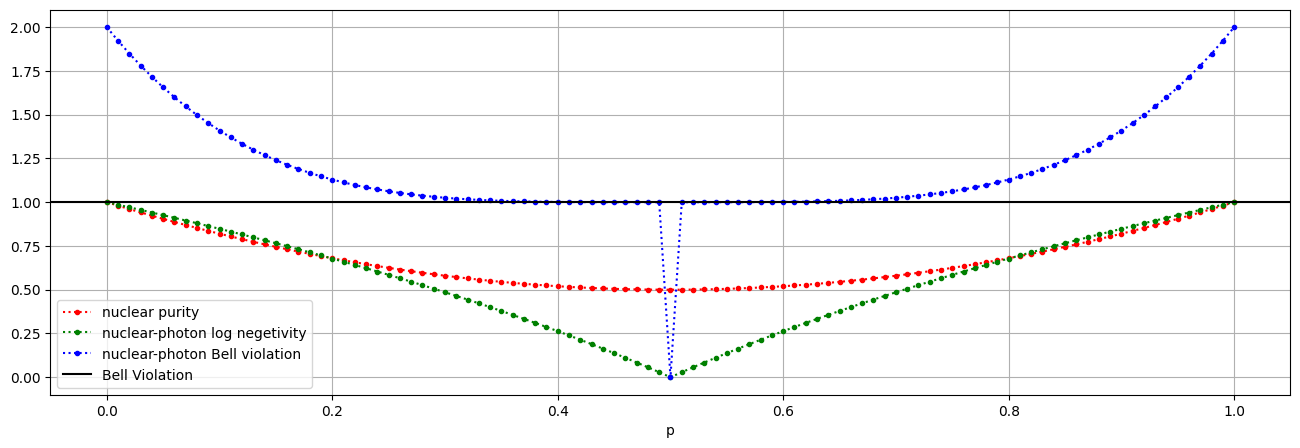

In [5]:
#plots

# purity
plt.figure(figsize=(16, 5))
plt.plot(plist, purity, label='nuclear purity',linestyle=':', marker = '.',color='red')
plt.plot(plist, entanglement, label='nuclear-photon log negetivity',linestyle=':', marker = '.',color='green')
plt.plot(plist, horodecki, label='nuclear-photon Bell violation', linestyle=':', marker='.', color='blue')
plt.xlabel('p')
plt.axhline(y=1, color='black', linestyle='-', label='Bell Violation')
plt.grid(True)
plt.legend()
plt.show()